In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import openai
import os
from LLM_LEx.kanLEx import KAN_LEx
import LLM_LEx

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
LLM_LEx.llm.check_key_limit(client)

2025-04-02 08:58:00,181 - LLMLEx.llm - INFO - API key check successful. Remaining limit: 120.61990945


120.61990945

In [30]:
def multivariate_function(x):
    return torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

# Initialize a KANSR instance for the multivariate function
multivariate_kansr = KAN_LEx(
    client=client,
    width=[2, 3, 1],
    grid=7,
    k=3,
    seed=0
)

multivariate_dataset = multivariate_kansr.create_dataset(
    f=multivariate_function,
    ranges=(-1, 1),
    n_var=2,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-02 09:37:10,615 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.61e-03 | test_loss: 1.64e-03 | reg: 1.11e+01 | : 100%|█| 50/50 [00:25<00:00,  1.98it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-02 09:37:36,457 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-02 09:37:36,463 - LLMLEx.kanLEx - INFO - Pruned model:
2025-04-02 09:37:36,628 - LLMLEx.kanLEx - INFO - Final train loss: 0.0016081738285720348


saving model version 0.2


0.0016081738285720348

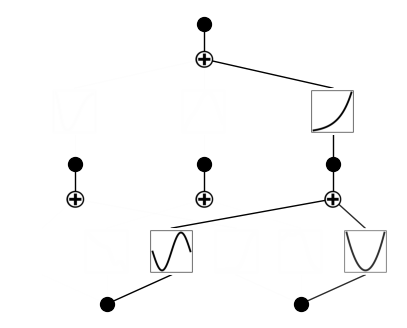

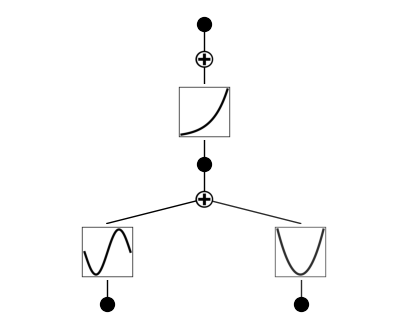

In [31]:
multivariate_kansr.train_kan(
    dataset=multivariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

2025-04-02 08:59:42,333 - LLMLEx.llm - INFO - API key usage check successful. Current usage: 179.38009055
2025-04-02 08:59:42,335 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-04-02 08:59:42,336 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-04-02 08:59:42,424 - LLMLEx.llm - INFO - API key usage check successful. Current usage: 179.38009055
2025-04-02 08:59:42,426 - LLMLEx.llmLEx - INFO - Processing KAN model connections
2025-04-02 08:59:42,428 - LLMLEx.llmLEx - INFO - Processing non-symbolic activation function (0,0,0)


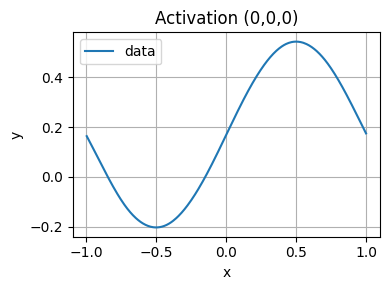

2025-04-02 08:59:42,535 - LLMLEx.llmLEx - INFO - Running genetic algorithm for connection (0,0,0)
2025-04-02 08:59:42,649 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -1.0029051303863525, for constant: [0.16643099]
2025-04-02 08:59:42,649 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-04-02 08:59:46,605 - LLMLEx.llmLEx - INFO - Generated 3 individuals
2025-04-02 08:59:46,607 - LLMLEx.llmLEx - INFO - Initial population best: score=-1.0945847861876246e-05, params=[3.73142599e-01 3.14200903e+00 1.70216873e-01 4.90370229e-06], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.cos(params[3] * x)...
2025-04-02 08:59:46,608 - LLMLEx.llmLEx - INFO - Exit condition met after initial population
2025-04-02 08:59:46,609 - LLMLEx.llmLEx - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 3
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 3 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 3 succeeded, 0 failed (100.00% success)
  Function Conversion: 3 succeeded, 0 failed (100.00% success)
  Curve Fitting: 3 succeeded, 0 failed (100.00% success)

Error types:
  No errors

Fitting warnings:
  - covariance estimation: 1
Approximation for (0,0,0): params[0] * np.sin(params[1] * x) + params[2] * np.cos(params[3] * x), with score -1.0945847861876246e-05 and parameters [0.373 3.142 0.17  0.   ]


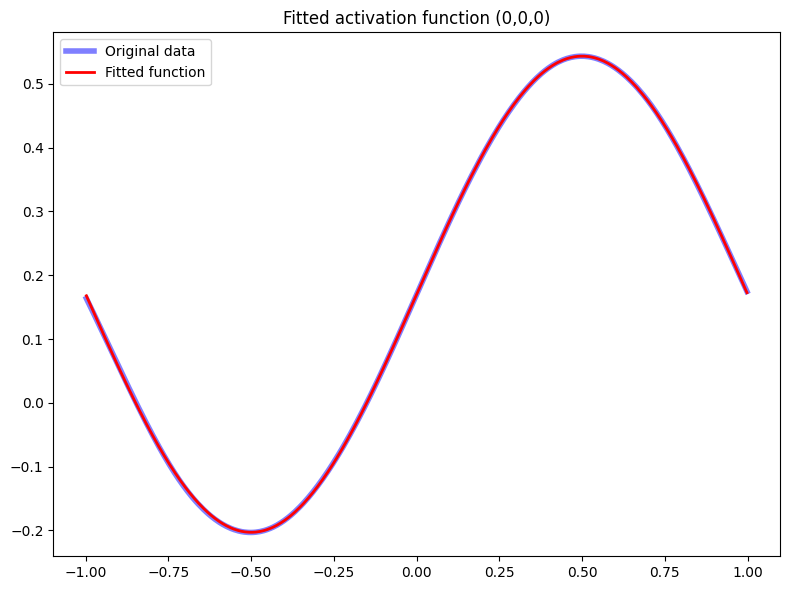

2025-04-02 08:59:46,722 - LLMLEx.llmLEx - INFO - Processing non-symbolic activation function (0,1,0)


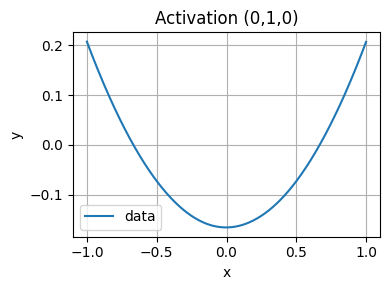

2025-04-02 08:59:46,792 - LLMLEx.llmLEx - INFO - Running genetic algorithm for connection (0,1,0)
2025-04-02 08:59:46,793 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -1.835069179534912, for constant: [-0.03827004]
2025-04-02 08:59:46,793 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-04-02 08:59:50,053 - LLMLEx.llmLEx - INFO - Generated 3 individuals
2025-04-02 08:59:50,055 - LLMLEx.llmLEx - INFO - Initial population best: score=-2.755782588792499e-06, params=[ 3.73300296e-01  3.94496829e-05 -1.65906810e-01], ansatz: params[0] * x**2 + params[1] * x + params[2]...
2025-04-02 08:59:50,056 - LLMLEx.llmLEx - INFO - Exit condition met after initial population
2025-04-02 08:59:50,057 - LLMLEx.llmLEx - INFO - Successfully found expression for connection (0,1,0)



API Call Statistics:
  Successful calls (end-to-end): 3
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 3 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 3 succeeded, 0 failed (100.00% success)
  Function Conversion: 3 succeeded, 0 failed (100.00% success)
  Curve Fitting: 3 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,1,0): params[0] * x**2 + params[1] * x + params[2], with score -2.755782588792499e-06 and parameters [ 0.373  0.    -0.166]


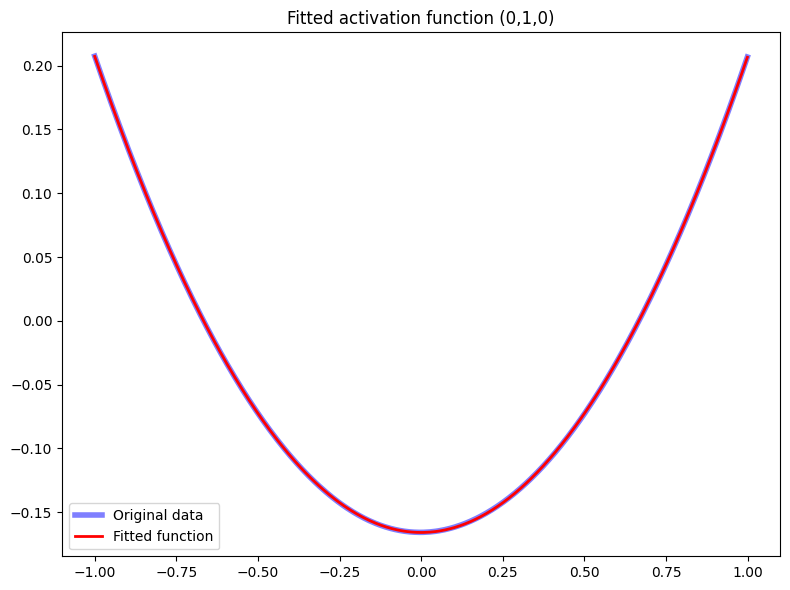

2025-04-02 08:59:50,174 - LLMLEx.llmLEx - INFO - Processing non-symbolic activation function (1,0,0)


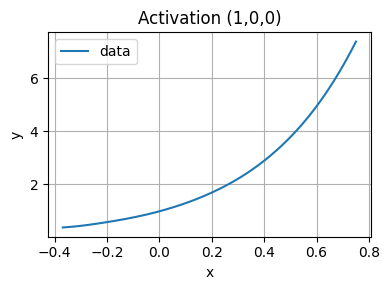

2025-04-02 08:59:50,251 - LLMLEx.llmLEx - INFO - Running genetic algorithm for connection (1,0,0)
2025-04-02 08:59:50,252 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -3.062145948410034, for constant: [1.84723069]
2025-04-02 08:59:50,252 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-04-02 08:59:52,538 - LLMLEx.llmLEx - INFO - Generated 3 individuals
2025-04-02 08:59:52,540 - LLMLEx.llmLEx - INFO - Initial population best: score=-3.707848691192339e-06, params=[-0.03052324 -0.04997328  1.01777042  2.65127725], ansatz: params[0] + params[1] * x + params[2] * np.exp(params[3] * x)...
2025-04-02 08:59:52,541 - LLMLEx.llmLEx - INFO - Exit condition met after initial population
2025-04-02 08:59:52,543 - LLMLEx.llmLEx - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 3
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 3 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 3 succeeded, 0 failed (100.00% success)
  Function Conversion: 3 succeeded, 0 failed (100.00% success)
  Curve Fitting: 3 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,0,0): params[0] + params[1] * x + params[2] * np.exp(params[3] * x), with score -3.707848691192339e-06 and parameters [-0.031 -0.05   1.018  2.651]


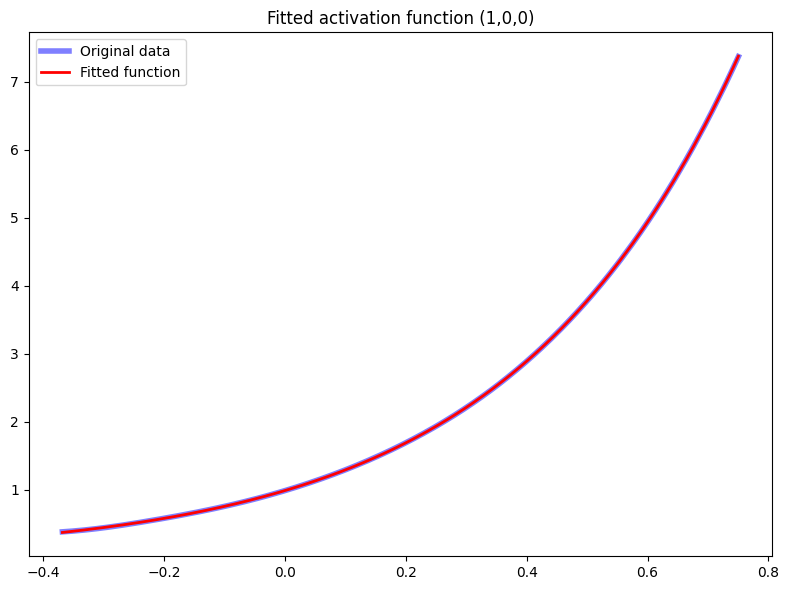

2025-04-02 08:59:52,732 - LLMLEx.llmLEx - INFO - KAN conversion complete: 3 total connections
2025-04-02 08:59:52,732 - LLMLEx.llmLEx - INFO - Connection breakdown: 0 symbolic, 0 zero, 3 processed
2025-04-02 08:59:52,803 - LLMLEx.llm - INFO - API key usage check successful. Current usage: 179.38009055
2025-04-02 08:59:52,803 - LLMLEx.llmLEx - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-04-02 08:59:52,804 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x) + params[2] * np.cos(params[3] * x), has parameters [0.4 3.1 0.2 0. ]
2025-04-02 08:59:52,804 - LLMLEx.kanLEx - INFO - Approximation for (0, 1, 0): params[0] * x**2 + params[1] * x + params[2], has parameters [ 0.4  0.  -0.2]
2025-04-02 08:59:52,804 - LLMLEx.kanLEx - INFO - Approximation for (1, 0, 0): params[0] + params[1] * x + params[2] * np.exp(params[3] * x), has parameters [-0.  -0.   1.   2.7]
2025-04-02 08:59:52,804 - LLMLEx.kanLEx - INFO - Building expression tr

In [10]:
best_expressions, best_chi_squareds, results_dicts, results_all_dicts = multivariate_kansr.get_symbolic(
    client=client,
    population=3,
    generations=2,
    temperature=0.1,
    gpt_model="openai/gpt-4o",
    verbose=1,
    use_async=True,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

In [11]:
best_expressions

['0.99999997151277*np.exp(1.00000000762645*x1**2 + 1.00000001322769*np.sin(3.14159273883653*x0))']